In [22]:
from __future__ import print_function
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras.datasets import mnist
#載入套件

In [23]:
def CNN_Onehot(x_train,x_test,batch_size,num_classes,epochs,y_train,y_test):
    #建構CNN單通道模型
    model = Sequential()
    #第一層卷積設定
    #設16個濾鏡（filter）
    #28*28圖片大小
    
    model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',input_shape=(28,28,1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    #第二層卷積設定
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    #平坦化
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10,activation='softmax'))
    
    #print模型摘要
    print(model.summary())
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    loss,acc = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', acc)
    
    #透過matplot繪圖顯示訓練過程
    plt.subplot(211)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')

In [24]:
batch_size = 128 # 批次大小
num_classes = 10 # 類別大小
epochs = 30 # 訓練迭代次數
(x_train, y_train), (x_test, y_test) = mnist.load_data()# 分割訓練集資料與測試集資料

#調整目標樣本型態，訓練集資料
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 轉換類別向量為二進制分類
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


## CNN_Onehot(x_train,x_test,batch_size,num_classes,epochs,y_train,y_test)
#模型訓練

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
activation_12 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
__________

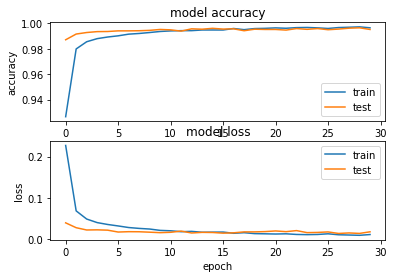

In [25]:
CNN_Onehot(x_train,x_test,batch_size,num_classes,epochs,y_train,y_test)